# Import Libraries & Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Specify the names of the desired sheets
sheet_names = ['INFO LOJA', 'FERIADOS', 'EVENTOS', 'DADOS VENDAS']

# Create a dictionary to store the DataFrames
dataframes = {}

# Read each sheet and store it in the dictionary
for sheet_name in sheet_names:
    dataframes[sheet_name] = pd.read_excel('/content/drive/MyDrive/PROJECT/Data/Dataset.xlsx', sheet_name=sheet_name)


# Now, we have four separate DataFrames
info_loja = dataframes['INFO LOJA']
feriados = dataframes['FERIADOS']
eventos = dataframes['EVENTOS']
dados_vendas = dataframes['DADOS VENDAS']


# Exploratory Data Analysis

In [ ]:
print("Info_Loja:")
info_loja.info()
print("\n" + "="*50 + "\n")

print("Feriados:")
feriados.info()
print("\n" + "="*50 + "\n")

print("Eventos:")
eventos.info()
print("\n" + "="*50 + "\n")

print("Dados_Vendas:")
dados_vendas.info()
print("\n" + "="*50 + "\n")


Info_Loja:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FK_LOJA              70 non-null     object        
 1   LOJA                 70 non-null     object        
 2   FK_CIDADE            70 non-null     int64         
 3   CIDADE               70 non-null     object        
 4   FK_REGIAO            70 non-null     int64         
 5   REGIAO               70 non-null     object        
 6   FK_SECAO             70 non-null     int64         
 7   SECAO                70 non-null     object        
 8   PRODUTIVIDADE/HORA   70 non-null     int64         
 9   N_COLABORADORES      70 non-null     int64         
 10  SKUS                 70 non-null     int64         
 11  ABERTURA             70 non-null     datetime64[ns]
 12  FECHO                70 non-null     datetime64[ns]
 13  CAIXAS TRADICIONAIS  70 no

# Add Column "FK_LOJA" to dados_vendas dataset

In [ ]:
# Merge the two DataFrames 'dados_vendas' and 'info_loja' based on the column 'LOJA'
dados_vendas = pd.merge(dados_vendas, info_loja[['LOJA', 'FK_LOJA']], how='left', on='LOJA')

# Print the resulting DataFrame
print(dados_vendas)


       FK_SECAO             LOJA       DATA  ITENS          VALOR  SKUS_+  \
0           522            Viseu 2020-01-05  33814  109862.214392     891   
1           522            Viseu 2020-01-09  22926   63819.583059    1655   
2           522            Viseu 2020-01-24  26055   72578.031031     894   
3           522            Viseu 2020-01-27  23556   60853.098660    1066   
4           522            Viseu 2020-01-30  21653   61461.643038    1296   
...         ...              ...        ...    ...            ...     ...   
98623      1581  S - Bento Jesus 2023-09-24   2525    4896.189803     457   
98624      1581  S - Bento Jesus 2023-09-28   2640    5069.048592     519   
98625      1581  S - Bento Jesus 2023-10-16   2473    4568.633783     644   
98626      1581  S - Bento Jesus 2023-10-17   2251    4641.189890     169   
98627      1581  S - Bento Jesus 2023-10-25   2324    4485.222868     420   

       SKUS_-  VAR_PREÇO_+  VAR_PREÇO_- FK_LOJA  
0        1581     0.13838

# Check for Null Values

In [ ]:
# Check for null values in 'info_loja'
null_values_info_loja = info_loja.isnull().sum()

# Check for null values in 'feriados'
null_values_feriados = feriados.isnull().sum()

# Check for null values in 'eventos'
null_values_eventos = eventos.isnull().sum()

# Check for null values in 'dados_vendas'
null_values_dados_vendas = dados_vendas.isnull().sum()

# Print the results
print("Null Values in 'INFO LOJA':\n", null_values_info_loja)
print("\nNull Values in 'FERIADOS':\n", null_values_feriados)
print("\nNull Values in 'EVENTOS':\n", null_values_eventos)
print("\nNull Values in 'DADOS VENDAS':\n", null_values_dados_vendas)



Null Values in 'INFO LOJA':
 FK_LOJA                0
LOJA                   0
FK_CIDADE              0
CIDADE                 0
FK_REGIAO              0
REGIAO                 0
FK_SECAO               0
SECAO                  0
PRODUTIVIDADE/HORA     0
N_COLABORADORES        0
SKUS                   0
ABERTURA               0
FECHO                  0
CAIXAS TRADICIONAIS    0
SELF CHECKOUTS         0
dtype: int64

Null Values in 'FERIADOS':
 FK_LOJA          0
LOJA            27
DATA             0
DESCRICAO        0
FERIADO_FIXO     0
TIPO             0
dtype: int64

Null Values in 'EVENTOS':
 FK_LOJA      0
LOJA         0
DATA_INI     0
DATA_FIM     0
DESCRICAO    0
dtype: int64

Null Values in 'DADOS VENDAS':
 FK_SECAO       0
LOJA           0
DATA           0
ITENS          0
VALOR          0
SKUS_+         0
SKUS_-         0
VAR_PREÇO_+    0
VAR_PREÇO_-    0
FK_LOJA        0
dtype: int64


Drop nos valores nulos de Feriados

In [ ]:
# Remove rows containing null values in the 'FERIADOS' column
feriados.dropna(subset=['LOJA'], inplace=True)

# Print the resulting DataFrame information
feriados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 2269
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FK_LOJA       2244 non-null   object        
 1   LOJA          2244 non-null   object        
 2   DATA          2244 non-null   datetime64[ns]
 3   DESCRICAO     2244 non-null   object        
 4   FERIADO_FIXO  2244 non-null   object        
 5   TIPO          2244 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 122.7+ KB


# Check for Outliers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for outliers in 'info_loja'
info_loja_descriptive_stats = info_loja.describe()
print("Descriptive Statistics for 'INFO LOJA':\n", info_loja_descriptive_stats)

# Check for outliers in 'feriados'
feriados_descriptive_stats = feriados.describe()
print("Descriptive Statistics for 'FERIADOS':\n", feriados_descriptive_stats)

# Check for outliers in 'eventos'
eventos_descriptive_stats = eventos.describe()
print("Descriptive Statistics for 'EVENTOS':\n", eventos_descriptive_stats)

# Check for outliers in 'dados_vendas'
dados_vendas_descriptive_stats = dados_vendas.describe()
print("Descriptive Statistics for 'DADOS VENDAS':\n", dados_vendas_descriptive_stats)


Descriptive Statistics for 'INFO LOJA':
         FK_CIDADE  FK_REGIAO     FK_SECAO  PRODUTIVIDADE/HORA  \
count   70.000000  70.000000    70.000000           70.000000   
mean   188.171429  11.442857   761.771429          195.414286   
std     58.551345   5.207675   390.992019           96.103732   
min      1.000000   1.000000    24.000000            0.000000   
25%    164.000000  11.000000   434.750000          132.250000   
50%    218.500000  14.000000   905.500000          177.000000   
75%    235.000000  14.000000   943.750000          230.500000   
max    244.000000  18.000000  1581.000000          461.000000   

       N_COLABORADORES          SKUS  CAIXAS TRADICIONAIS  SELF CHECKOUTS  
count        70.000000     70.000000            70.000000       70.000000  
mean         25.414286  11030.942857            14.928571        3.128571  
std          19.908117  13517.317611             6.804349        5.250042  
min           7.000000   2523.000000             3.000000        0.00

<ipython-input-7-33a6757723a8>:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  feriados_descriptive_stats = feriados.describe()
<ipython-input-7-33a6757723a8>:13: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  eventos_descriptive_stats = eventos.describe()
<ipython-input-7-33a6757723a8>:13: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  eventos_descriptive_stats = eventos.describe()


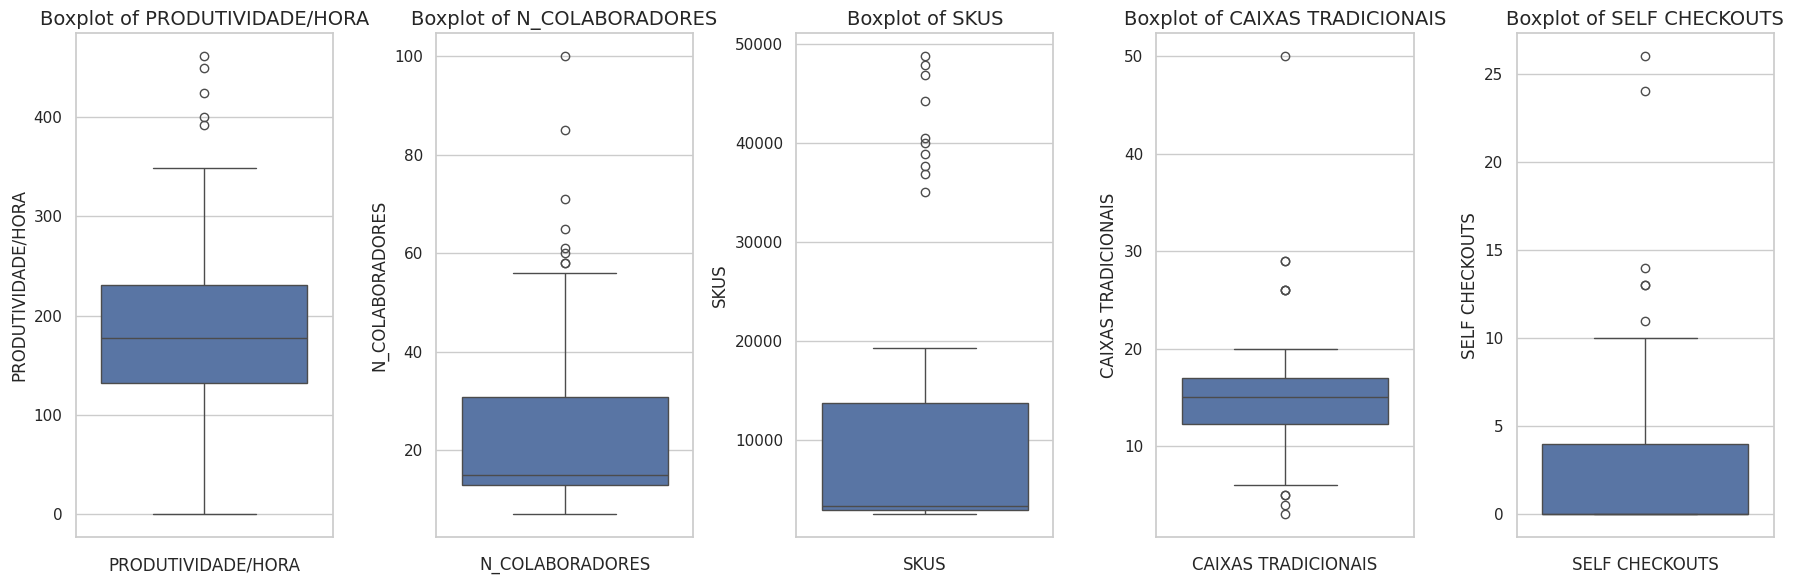

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Select columns for the boxplots
selected_columns = ['PRODUTIVIDADE/HORA', 'N_COLABORADORES', 'SKUS', 'CAIXAS TRADICIONAIS', 'SELF CHECKOUTS']

# Create side-by-side subplots in vertical orientation
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(18, 6))

# Iterate over selected columns and create boxplots
for i, column in enumerate(selected_columns):
    sns.boxplot(ax=axes[i], y=info_loja[column])  # Use y for vertical orientation
    axes[i].set_title(f'Boxplot of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show subplots
plt.show()




Temos de remover valores zero ?? colocar media

In [ ]:
import pandas as pd

# Group dados_vendas by store and calculate the mean of ITEM
mean_per_store = dados_vendas.groupby('FK_LOJA')['ITENS'].mean().reset_index()
mean_per_store.rename(columns={'ITENS': 'MEDIA_ITEM'}, inplace=True)

# Merge the mean ITEM back to the info_loja DataFrame
info_loja_2 = pd.merge(info_loja, mean_per_store, on='FK_LOJA', how='left')

# Display the resulting DataFrame
print(info_loja_2)



   FK_LOJA                       LOJA  FK_CIDADE               CIDADE  \
0   POR025                  Alfragide        228            Alfragide   
1   POR012               Almada Fórum        164               Almada   
2   POR029                    Alverca        227              Alverca   
3   POR032                     Aveiro        111               Aveiro   
4   POR052           Caldas da Rainha        171     Caldas da Rainha   
..     ...                        ...        ...                  ...   
65  POR438  S - Rua Visconde Santarém        235               Lisboa   
66   U0141    S - Vila Franca de Xira        244  Vila Franca de Xira   
67  POR039              Vila do Conde         97        Vila do Conde   
68  POR036                  Vila Real        100            Vila Real   
69  POR010                      Viseu        237                Viseu   

    FK_REGIAO          REGIAO  FK_SECAO           SECAO  PRODUTIVIDADE/HORA  \
0          14  Lisboa Central       976  Fre

In [ ]:
import pandas as pd

# Add the new column 'FECHO_ABERTURA' in hours (assuming 'FECHO' and 'ABERTURA' are in hour format)
info_loja_2['FECHO_ABERTURA'] = (info_loja_2['FECHO'] - info_loja_2['ABERTURA']).dt.total_seconds() / 3600

# Display the resulting DataFrame
print(info_loja_2)


   FK_LOJA                       LOJA  FK_CIDADE               CIDADE  \
0   POR025                  Alfragide        228            Alfragide   
1   POR012               Almada Fórum        164               Almada   
2   POR029                    Alverca        227              Alverca   
3   POR032                     Aveiro        111               Aveiro   
4   POR052           Caldas da Rainha        171     Caldas da Rainha   
..     ...                        ...        ...                  ...   
65  POR438  S - Rua Visconde Santarém        235               Lisboa   
66   U0141    S - Vila Franca de Xira        244  Vila Franca de Xira   
67  POR039              Vila do Conde         97        Vila do Conde   
68  POR036                  Vila Real        100            Vila Real   
69  POR010                      Viseu        237                Viseu   

    FK_REGIAO          REGIAO  FK_SECAO           SECAO  PRODUTIVIDADE/HORA  \
0          14  Lisboa Central       976  Fre

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'info_loja_2' and you want to filter out stores with zero productivity
zero_productivity_stores = info_loja_2[info_loja_2['PRODUTIVIDADE/HORA'] == 0]['LOJA']

# Then you can proceed with your code
zero_prod_stores_features = info_loja_2[info_loja_2['LOJA'].isin(zero_productivity_stores)][['LOJA', 'N_COLABORADORES', 'ABERTURA', 'FECHO', 'CAIXAS TRADICIONAIS', 'SKUS']]
zero_prod_stores_features['HORAS_TRABALHADAS'] = (pd.to_datetime(zero_prod_stores_features['FECHO']) - pd.to_datetime(zero_prod_stores_features['ABERTURA'])).dt.seconds / 3600
zero_prod_stores_features = zero_prod_stores_features[['LOJA', 'N_COLABORADORES', 'HORAS_TRABALHADAS', 'CAIXAS TRADICIONAIS', 'SKUS']]
zero_prod_stores_features

,LOJA,N_COLABORADORES,HORAS_TRABALHADAS,CAIXAS TRADICIONAIS,SKUS
30,S - Ajuda,16,14.0,17,3235
42,S - Cacilhas,13,12.0,15,3172
66,S - Vila Franca de Xira,11,10.0,17,2912


In [ ]:
# Defining a tolerance threshold for the characteristics
tolerance = {
    'N_COLABORADORES': 2,  # Tolerance for the number of collaborators
    'CAIXAS TRADICIONAIS': 2,  # Tolerance for the number of traditional checkout counters
    'SKUS': 300  # Tolerance for the number of SKUs
}

# Function to find stores with similar characteristics
def find_similar_stores(store_features, tolerance):
    # Filter stores with productivity > 0
    potential_matches = info_loja_2[info_loja_2['PRODUTIVIDADE/HORA'] > 0]
    for column, tol in tolerance.items():
        min_val = store_features[column] - tol
        max_val = store_features[column] + tol
        potential_matches = potential_matches[(potential_matches[column] >= min_val) & (potential_matches[column] <= max_val)]
    return potential_matches

# Dictionary to store the calculated averages
updated_prod_values = {}

# Loop through stores with productivity = 0 to find averages of similar stores
for index, row in zero_prod_stores_features.iterrows():
    similar_stores = find_similar_stores(row, tolerance)
    if not similar_stores.empty:
        avg_prod = similar_stores['PRODUTIVIDADE/HORA'].mean()
        updated_prod_values[row['LOJA']] = avg_prod

updated_prod_values


{'S - Ajuda': 164.71428571428572,
 'S - Cacilhas': 153.25,
 'S - Vila Franca de Xira': 128.0}

In [ ]:
# Replace the values in the 'PRODUTIVIDADE/HORA' column of info_loja_2 with the calculated averages
info_loja_2.loc[info_loja_2['PRODUTIVIDADE/HORA'] == 0, 'PRODUTIVIDADE/HORA'] = info_loja_2.loc[info_loja_2['PRODUTIVIDADE/HORA'] == 0, 'LOJA'].map(updated_prod_values)

In [ ]:
# Assuming 'info_loja_2' is the DataFrame containing the information
# Make sure the DataFrame is filled with the desired data.

# Check the value of PRODUTIVIDADE/HORA for the store with FK_LOJA equal to 'U0143'
productivity_value_u0143 = info_loja_2.loc[info_loja_2['FK_LOJA'] == 'U0143', 'PRODUTIVIDADE/HORA'].values[0]

# Display the value
print(f"PRODUTIVIDADE/HORA for store U0143: {productivity_value_u0143}")



PRODUTIVIDADE/HORA for store U0143: 164.71428571428572


# Sales Analyses

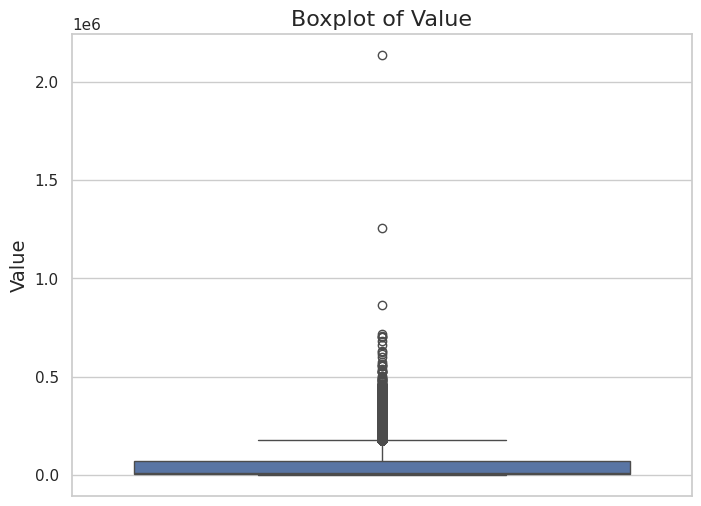

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set seaborn style (optional)
sns.set(style="whitegrid")

# Create boxplot for the column 'VALOR'
plt.figure(figsize=(8, 6))
sns.boxplot(y=dados_vendas['VALOR'])

# Add title and axis labels
plt.title('Boxplot of Value', fontsize=16)
plt.ylabel('Value', fontsize=14)

# Show the boxplot
plt.show()



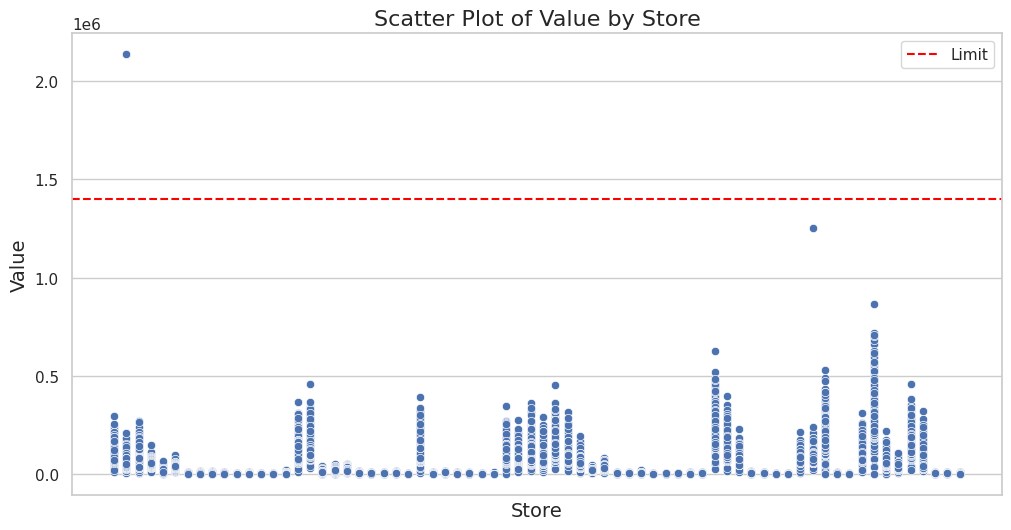

In [ ]:
# Create a scatter plot for the column 'VALOR' with 'FK_LOJA' on the x-axis
plt.figure(figsize=(12, 6))
sns.scatterplot(x=dados_vendas['FK_LOJA'], y=dados_vendas['VALOR'])

# Add title and axis labels
plt.title('Scatter Plot of Value by Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Add a red line at y=1400000
plt.axhline(y=1400000, color='red', linestyle='--', label='Limit')

# Remove x-axis legend
plt.xticks([])

# Add legend
plt.legend()

# Show the scatter plot
plt.show()



In [ ]:
# Filter the DataFrame for rows where 'VALOR' is greater than 1400000
stores_above_1400000 = dados_vendas.loc[dados_vendas['VALOR'] > 1400000, 'FK_LOJA']

# Display the results
print("FK_LOJA with values above 1400000:")
print(stores_above_1400000.unique())

FK_LOJA with values above 1400000:
['POR013']


In [ ]:
# Remove rows with values greater than 1400000 in the 'VALOR' column
dados_vendas = dados_vendas.drop(dados_vendas[dados_vendas['VALOR'] > 1400000].index)

# Display the DataFrame after the dropout
print(dados_vendas)


       FK_SECAO             LOJA       DATA  ITENS          VALOR  SKUS_+  \
0           522            Viseu 2020-01-05  33814  109862.214392     891   
1           522            Viseu 2020-01-09  22926   63819.583059    1655   
2           522            Viseu 2020-01-24  26055   72578.031031     894   
3           522            Viseu 2020-01-27  23556   60853.098660    1066   
4           522            Viseu 2020-01-30  21653   61461.643038    1296   
...         ...              ...        ...    ...            ...     ...   
98623      1581  S - Bento Jesus 2023-09-24   2525    4896.189803     457   
98624      1581  S - Bento Jesus 2023-09-28   2640    5069.048592     519   
98625      1581  S - Bento Jesus 2023-10-16   2473    4568.633783     644   
98626      1581  S - Bento Jesus 2023-10-17   2251    4641.189890     169   
98627      1581  S - Bento Jesus 2023-10-25   2324    4485.222868     420   

       SKUS_-  VAR_PREÇO_+  VAR_PREÇO_- FK_LOJA  
0        1581     0.13838

# EXPORT TO CSV

In [ ]:
# Salvando o DataFrame em um arquivo CSV
info_loja_2.to_csv('info_loja_2.csv', index=False)
feriados.to_csv('feriados.csv', index=False)
eventos.to_csv('eventos.csv', index=False)
dados_vendas.to_csv('dados_vendas.csv', index=False)


In [ ]:
from google.colab import files

files.download('info_loja_2.csv')
files.download('dados_vendas.csv')
files.download('eventos.csv')
files.download('feriados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>